In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from time import time

# Sklearn preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Sklearn model selection
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# Sklearn classifiers
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier,
    StackingClassifier,
    VotingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Sklearn metrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    auc,
    balanced_accuracy_score,
    cohen_kappa_score,
    precision_recall_fscore_support
)

# Sklearn calibration
from sklearn.calibration import CalibratedClassifierCV

# Sklearn utilities
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight

# Other libraries
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras

## DATA LOADING

In [87]:
print("="*60)
print("LOADING DATA")
print("="*60)

# Check where data starts in CSV (skip comment lines)
with open("KOI.csv", "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if not line.startswith("#"):
            print(f"Data starts at line {i+1}")
            break

# Load the dataset
df = pd.read_csv("KOI.csv", comment="#", sep=",", skip_blank_lines=True)
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

LOADING DATA
Data starts at line 54
Dataset loaded: 9564 rows, 49 columns


In [88]:
# Display first few rows and column info
pd.set_option('display.max_columns', None)
print("\nFirst 5 rows:")
display(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nDataset info:")
df.info()


First 5 rows:


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509



Column names:
['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------            

## MISSING VALUES ANALYSIS


MISSING VALUES ANALYSIS

Columns with missing data:


,Missing Values,Percentage
koi_teq_err1,9564,100.00
koi_teq_err2,9564,100.00
kepler_name,6817,71.28
koi_score,1510,15.79
koi_steff_err2,483,5.05
koi_srad_err2,468,4.89
koi_srad_err1,468,4.89
koi_slogg_err2,468,4.89
koi_slogg_err1,468,4.89
koi_steff_err1,468,4.89


C:\Users\salma\AppData\Local\Temp\ipykernel_54180\1167865321.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y='Percentage', data=missing_data, palette='viridis')


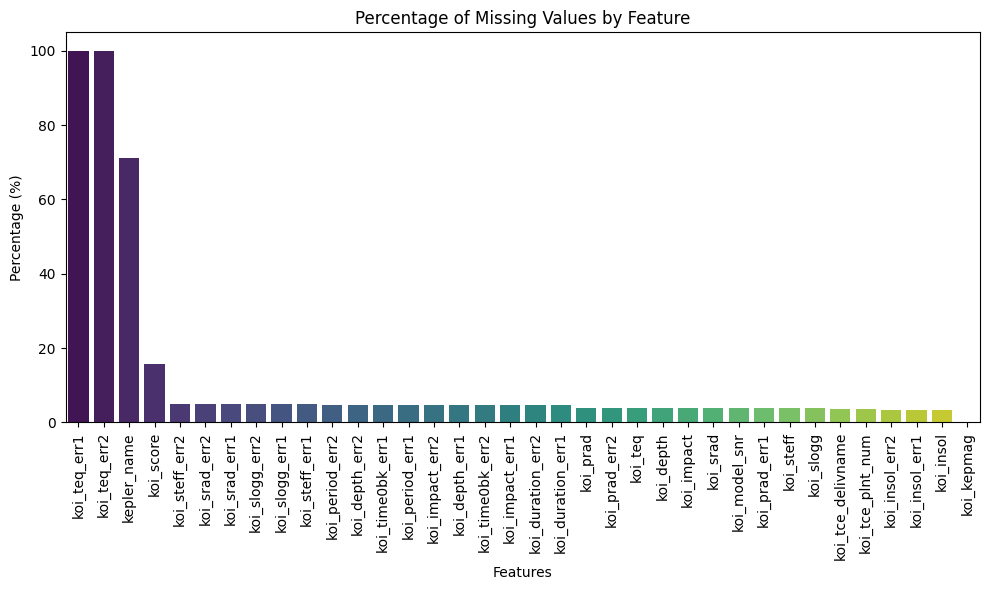

In [89]:
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent.round(2)
})

# Filter to only columns with missing data
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data.sort_values(by='Percentage', ascending=False, inplace=True)

print("\nColumns with missing data:")
display(missing_data)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y='Percentage', data=missing_data, palette='viridis')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percentage (%)')
plt.xlabel('Features')
plt.tight_layout()
plt.show()


## DATA CLEANING

In [90]:
print("\n" + "="*60)
print("DATA CLEANING")
print("="*60)

# Remove columns with more than 30% missing data
threshold = 30.0
cols_to_drop = missing_data[missing_data['Percentage'] > threshold].index
print(f"\nDropping columns with more than {threshold}% missing data:")
print(list(cols_to_drop))
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dataset shape after dropping columns: {df.shape[0]} rows, {df.shape[1]} columns")

# Drop rows with any remaining missing values
# initial_shape = df.shape
# df.dropna(inplace=True)
# print(f"\nDropped {initial_shape[0] - df.shape[0]} rows with missing values")
# print(f"New shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Check remaining missing values after column drop
remaining_missing = df.isnull().sum().sum()
print(f"\nRemaining missing values after column drop: {remaining_missing}")
print(f"Current shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Save cleaned dataset
df.to_csv("saves/cleaned_koi_dataset.csv", index=False)
print("\nCleaned dataset saved to 'saves/cleaned_koi_dataset.csv'")


DATA CLEANING

Dropping columns with more than 30.0% missing data:
['koi_teq_err1', 'koi_teq_err2', 'kepler_name']
Dataset shape after dropping columns: 9564 rows, 46 columns

Remaining missing values after column drop: 14159
Current shape: 9564 rows, 46 columns

Cleaned dataset saved to 'saves/cleaned_koi_dataset.csv'


## TARGET VARIABLE ANALYSIS


TARGET VARIABLE ANALYSIS

Target Distribution (counts):
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

Target Distribution (percentages):
koi_disposition
FALSE POSITIVE    50.595985
CONFIRMED         28.711836
CANDIDATE         20.692179
Name: proportion, dtype: float64


C:\Users\salma\AppData\Local\Temp\ipykernel_54180\945432339.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='koi_disposition', data=df,


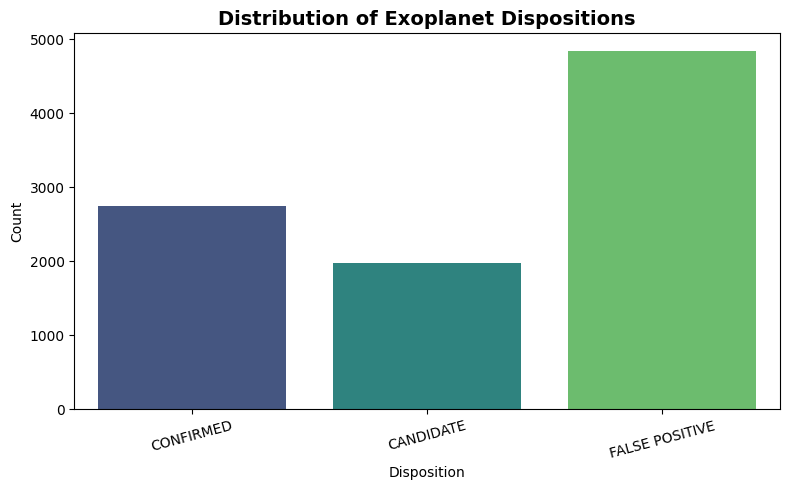

In [91]:
print("\n" + "="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)

print("\nTarget Distribution (counts):")
print(df['koi_disposition'].value_counts())

print("\nTarget Distribution (percentages):")
print(df['koi_disposition'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='koi_disposition', data=df, 
              order=['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'],
              palette='viridis')
plt.title("Distribution of Exoplanet Dispositions", fontsize=14, fontweight='bold')
plt.xlabel("Disposition")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## SEPARATE CANDIDATES FOR FUTURE PREDICTION

In [92]:
print("\n" + "="*60)
print("SEPARATING CANDIDATE DATA")
print("="*60)

# Remove and save "CANDIDATE" rows into a separate file
candidates = df[df['koi_disposition'] == 'CANDIDATE'].copy()
candidates.to_csv("saves/koi_candidates.csv", index=False)
print(f"\nSaved {len(candidates)} CANDIDATE rows to 'saves/koi_candidates.csv'")

# Keep only CONFIRMED and FALSE POSITIVE for training
df = df[df['koi_disposition'] != 'CANDIDATE']
print(f"Training dataset: {len(df)} rows (CONFIRMED + FALSE POSITIVE only)")

print("\nNew Target Distribution (counts):")
print(df['koi_disposition'].value_counts())

print("\nNew Target Distribution (percentages):")
print(df['koi_disposition'].value_counts(normalize=True) * 100)


SEPARATING CANDIDATE DATA

Saved 1979 CANDIDATE rows to 'saves/koi_candidates.csv'
Training dataset: 7585 rows (CONFIRMED + FALSE POSITIVE only)

New Target Distribution (counts):
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
Name: count, dtype: int64

New Target Distribution (percentages):
koi_disposition
FALSE POSITIVE    63.796968
CONFIRMED         36.203032
Name: proportion, dtype: float64


## BALANCE THE DATASET

In [93]:
print("\n" + "="*60)
print("BALANCING THE DATASET")
print("="*60)

# Separate majority and minority classes
df_majority = df[df['koi_disposition'] == 'FALSE POSITIVE']
df_minority = df[df['koi_disposition'] == 'CONFIRMED']

print(f"\nBefore balancing:")
print(f"FALSE POSITIVE: {len(df_majority)}")
print(f"CONFIRMED: {len(df_minority)}")

# Downsample the majority class to match minority class
df_majority_downsampled = resample(
    df_majority, 
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nAfter balancing:")
print(df_balanced['koi_disposition'].value_counts())


BALANCING THE DATASET

Before balancing:
FALSE POSITIVE: 4839
CONFIRMED: 2746

After balancing:
koi_disposition
FALSE POSITIVE    2746
CONFIRMED         2746
Name: count, dtype: int64


## FEATURE SELECTION & PREPARATION

In [94]:
print("\n" + "="*60)
print("FEATURE PREPARATION")
print("="*60)

# Define numeric features for training
numeric_features = [
    'koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
    'koi_teq', 'koi_insol', 'koi_model_snr',
    'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag'
]

# Verify all features exist
available_features = [f for f in numeric_features if f in df_balanced.columns]
if len(available_features) != len(numeric_features):
    missing = set(numeric_features) - set(available_features)
    print(f"Warning: Missing features: {missing}")
    numeric_features = available_features

print(f"\nUsing {len(numeric_features)} features:")
print(numeric_features)

# Prepare features and labels
X = df_balanced[numeric_features]
y = df_balanced['koi_disposition'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})


# Impute missing values in features
print("\nImputing missing values...")
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=numeric_features,
    index=X.index
)
missing_before = X.isnull().sum().sum()
print(f"Missing values before imputation: {missing_before}")
print(f"Missing values after imputation: {X_imputed.isnull().sum().sum()}")

# Use imputed data
X = X_imputed

# Optional: Add after imputation in Section 8
print(f"Total values imputed: {missing_before}")
if missing_before > 0:
    print("Imputed features:")
    print(X.isnull().sum()[X.isnull().sum() > 0])
    
    
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Class distribution: {y.value_counts().to_dict()}")


FEATURE PREPARATION

Using 11 features:
['koi_period', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag']

Imputing missing values...
Missing values before imputation: 1188
Missing values after imputation: 0
Total values imputed: 1188
Imputed features:
Series([], dtype: int64)

Feature matrix shape: (5492, 11)
Target vector shape: (5492,)
Class distribution: {0: 2746, 1: 2746}


## TRAIN-TEST SPLIT

In [95]:
print("\n" + "="*60)
print("TRAIN-TEST SPLIT")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y, 
    test_size=0.3, 
    random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training class distribution: {y_train.value_counts().to_dict()}")
print(f"Test class distribution: {y_test.value_counts().to_dict()}")


TRAIN-TEST SPLIT
Training set: 3844 samples
Test set: 1648 samples
Training class distribution: {1: 1922, 0: 1922}
Test class distribution: {1: 824, 0: 824}


## FEATURE SCALING

In [96]:
print("\n" + "="*60)
print("FEATURE SCALING")
print("="*60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print(f"Training data scaled shape: {X_train_scaled.shape}")
print(f"Test data scaled shape: {X_test_scaled.shape}")


FEATURE SCALING
Features scaled using StandardScaler
Training data scaled shape: (3844, 11)
Test data scaled shape: (1648, 11)


## MODEL TRAINING - STACKING ENSEMBLE

In [97]:
print("\n" + "="*60)
print("TRAINING STACKING ENSEMBLE MODEL")
print("="*60)

# Define base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42))
]

# Create stacking classifier
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)

# Train the model
print("\nTraining model...")
start_time = time()
stack.fit(X_train_scaled, y_train)
training_time = time() - start_time
print(f"Training completed in {training_time:.2f} seconds")


TRAINING STACKING ENSEMBLE MODEL

Training model...
Training completed in 4.62 seconds


## CROSS-VALIDATION EVALUATION

In [98]:
print("\n" + "="*60)
print("CROSS-VALIDATION EVALUATION")
print("="*60)

cv_scores = cross_val_score(stack, X_train_scaled, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


CROSS-VALIDATION EVALUATION
Cross-validation AUC scores: [0.96592262 0.97967397 0.97322105 0.97766504 0.96052382]
Mean AUC: 0.9714 (+/- 0.0072)


## MODEL EVALUATION ON TEST SET


MODEL EVALUATION ON TEST SET

Accuracy: 0.9090
Balanced Accuracy: 0.9090
F1 Score: 0.9101
ROC AUC: 0.9654

Confusion Matrix:
[[739  85]
 [ 65 759]]

Classification Report:
                precision    recall  f1-score   support

FALSE POSITIVE       0.92      0.90      0.91       824
     CONFIRMED       0.90      0.92      0.91       824

      accuracy                           0.91      1648
     macro avg       0.91      0.91      0.91      1648
  weighted avg       0.91      0.91      0.91      1648



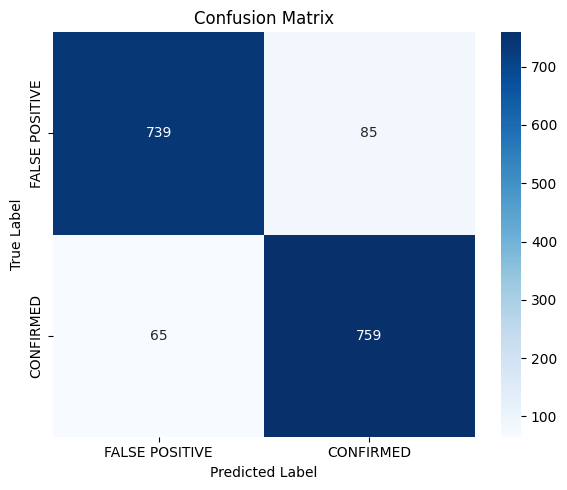

In [99]:
print("\n" + "="*60)
print("MODEL EVALUATION ON TEST SET")
print("="*60)

# Predictions
y_pred = stack.predict(X_test_scaled)
y_proba = stack.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['FALSE POSITIVE', 'CONFIRMED']))

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['FALSE POSITIVE', 'CONFIRMED'],
            yticklabels=['FALSE POSITIVE', 'CONFIRMED'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## ROC CURVE


ROC CURVE ANALYSIS


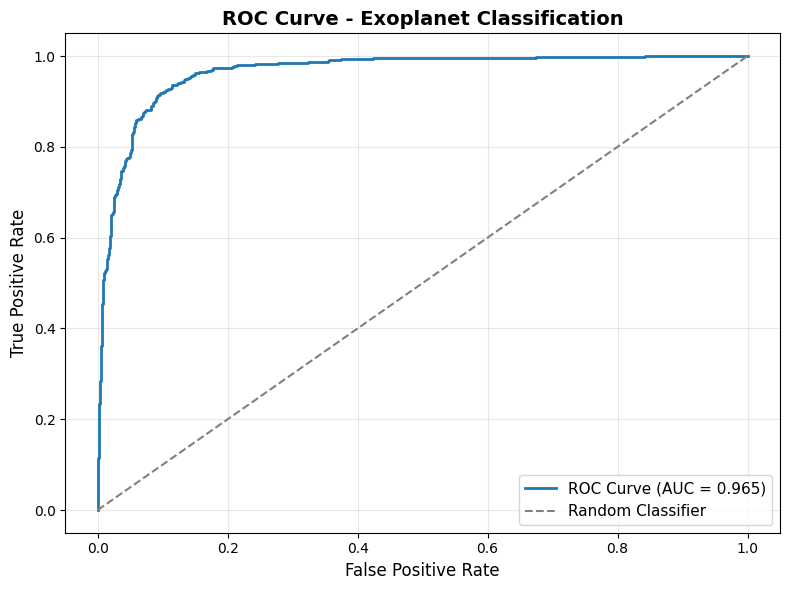

In [100]:
print("\n" + "="*60)
print("ROC CURVE ANALYSIS")
print("="*60)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_val:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Exoplanet Classification', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## FEATURE IMPORTANCE ANALYSIS


FEATURE IMPORTANCE ANALYSIS

Feature Importances (sorted):


,Feature,Importance
10,koi_prad,0.325478
9,koi_model_snr,0.194381
8,koi_period,0.116864
7,koi_insol,0.082393
6,koi_duration,0.071958
5,koi_depth,0.059185
4,koi_teq,0.055957
3,koi_steff,0.028954
2,koi_srad,0.024781
1,koi_slogg,0.022394


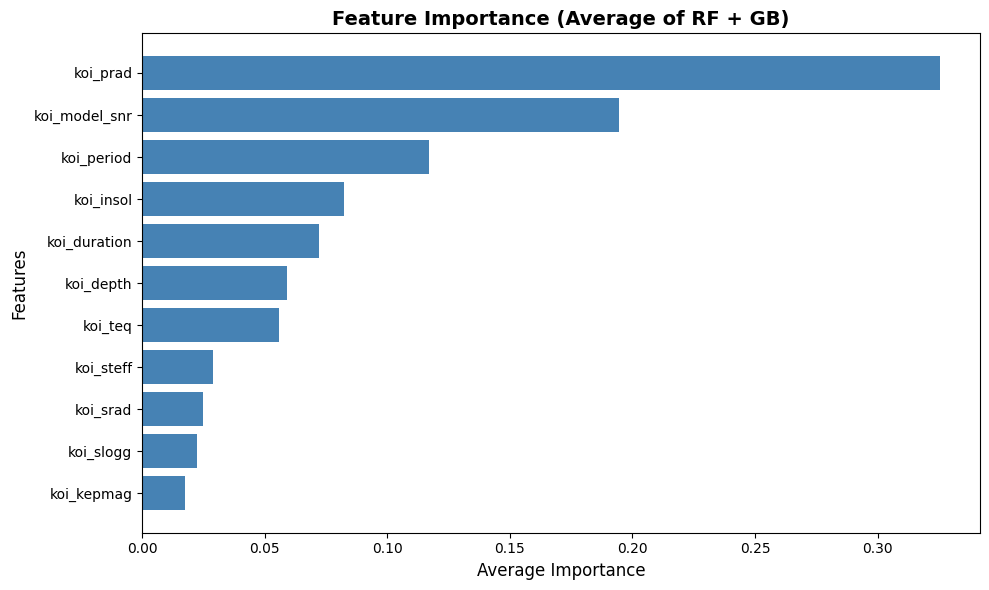

In [101]:
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Extract feature importances from base estimators
rf_model = stack.named_estimators_['rf']
gb_model = stack.named_estimators_['gb']

# Average importance across both models
avg_importances = (rf_model.feature_importances_ + gb_model.feature_importances_) / 2
sorted_idx = np.argsort(avg_importances)

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': np.array(numeric_features)[sorted_idx],
    'Importance': avg_importances[sorted_idx]
})

print("\nFeature Importances (sorted):")
display(importance_df.sort_values('Importance', ascending=False))

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(np.array(numeric_features)[sorted_idx], avg_importances[sorted_idx], color='steelblue')
plt.xlabel('Average Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (Average of RF + GB)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## MODEL CALIBRATION

In [102]:
print("\n" + "="*60)
print("MODEL CALIBRATION")
print("="*60)

print("Calibrating model using Platt scaling...")
calibrated_stack = CalibratedClassifierCV(stack, cv=5, method='sigmoid')
calibrated_stack.fit(X_train_scaled, y_train)
print("Calibration complete")

# Evaluate calibrated model
y_pred_calibrated = calibrated_stack.predict(X_test_scaled)
y_proba_calibrated = calibrated_stack.predict_proba(X_test_scaled)[:, 1]

print("\nCalibrated Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_calibrated):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_calibrated):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_calibrated):.4f}")


MODEL CALIBRATION
Calibrating model using Platt scaling...
Calibration complete

Calibrated Model Performance:
Accuracy: 0.9059
F1 Score: 0.9070
ROC AUC: 0.9652


## PREDICTION CONFIDENCE ANALYSIS


PREDICTION CONFIDENCE ANALYSIS


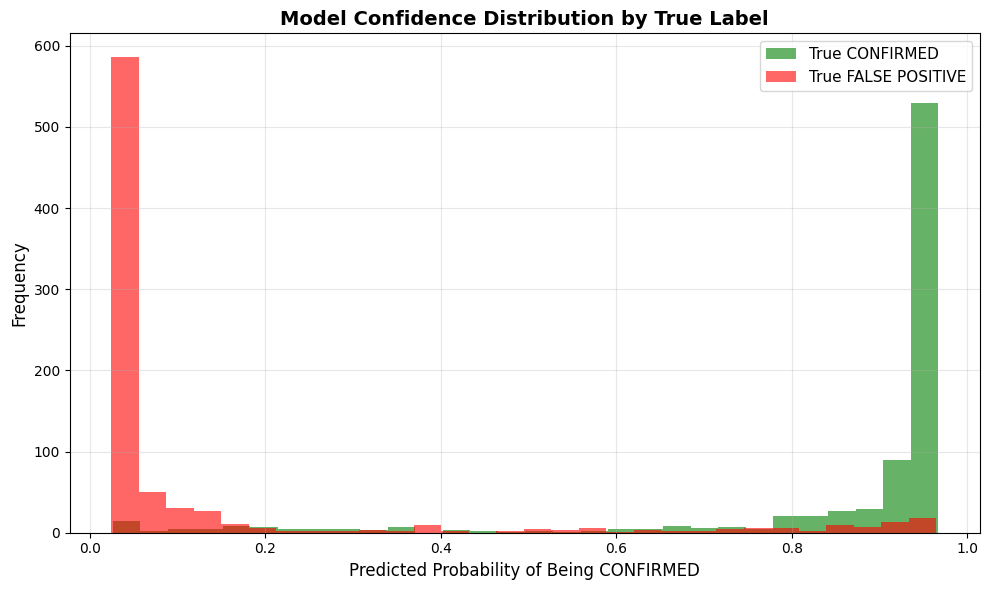


Number of misclassifications: 155 out of 1648 (9.41%)

Sample misclassifications:


,koi_period,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_kepmag,True_Label,Predicted_Label,Predicted_Prob
2339,45.396538,3.8260,1001.6,1.97,326.0,2.66,15.3,4266.0,4.626,0.643,15.984,0,1,0.946761
849,6.967049,3.7300,213.7,6.14,1774.0,2341.58,18.6,6303.0,3.595,3.530,13.487,1,0,0.217651
4613,3.157221,3.7620,49.7,1.41,1791.0,2436.47,17.4,6120.0,3.934,2.000,13.266,1,0,0.466192
2939,384.847556,9.9690,189.9,1.09,220.0,0.56,12.3,5579.0,4.580,0.798,13.426,1,0,0.037390
1962,2.440839,0.9680,509.5,21.29,986.0,223.80,14.4,4803.0,4.623,0.698,15.877,1,0,0.177309
274,18.925372,3.9835,640.9,13.92,1171.0,443.58,41.0,4941.0,3.317,4.885,14.604,1,0,0.300131
2709,9.058466,6.3760,61.8,2.46,1310.0,695.41,17.9,5198.0,3.614,3.207,12.193,0,1,0.789042
1691,0.900376,1.2570,41.4,0.82,2078.0,4399.18,14.6,5676.0,4.247,1.280,13.387,1,0,0.192770
398,4.768877,1.6720,115.8,2.11,1532.0,1303.61,20.0,6063.0,3.926,1.855,13.388,0,1,0.776212
4824,2.866680,1.1264,712.4,2.93,1045.0,282.64,43.0,5238.0,4.598,0.764,15.028,0,1,0.945233


In [103]:
print("\n" + "="*60)
print("PREDICTION CONFIDENCE ANALYSIS")
print("="*60)

# Create results dataframe
results_df = X_test.copy()
results_df['True_Label'] = y_test
results_df['Predicted_Label'] = y_pred_calibrated
results_df['Predicted_Prob'] = y_proba_calibrated

# Visualize confidence distribution
plt.figure(figsize=(10, 6))
plt.hist(results_df[results_df['True_Label'] == 1]['Predicted_Prob'], 
         bins=30, alpha=0.6, label='True CONFIRMED', color='green')
plt.hist(results_df[results_df['True_Label'] == 0]['Predicted_Prob'], 
         bins=30, alpha=0.6, label='True FALSE POSITIVE', color='red')
plt.xlabel("Predicted Probability of Being CONFIRMED", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Model Confidence Distribution by True Label", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze misclassifications
mismatches = results_df[results_df['True_Label'] != results_df['Predicted_Label']]
print(f"\nNumber of misclassifications: {len(mismatches)} out of {len(results_df)} ({len(mismatches)/len(results_df)*100:.2f}%)")

if len(mismatches) > 0:
    print("\nSample misclassifications:")
    display(mismatches.sample(min(10, len(mismatches)), random_state=42))

## PREDICT CANDIDATE KOIs


PREDICTING CANDIDATE KOIs
Loaded 1979 candidate KOIs
Candidates imputed using training imputer

Predictions complete:
Predicted as CONFIRMED: 578
Predicted as FALSE POSITIVE: 1401


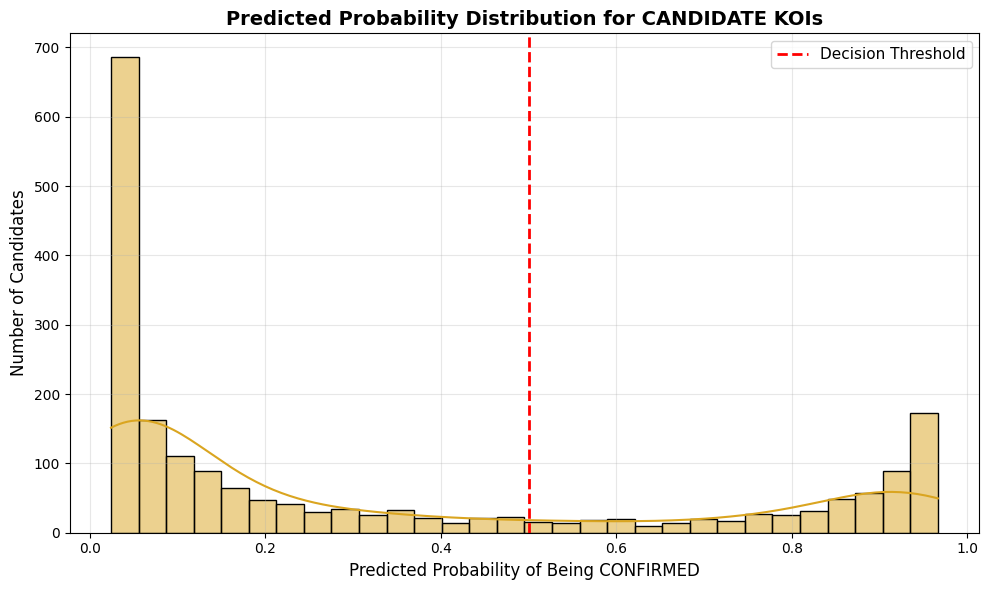

In [104]:
print("\n" + "="*60)
print("PREDICTING CANDIDATE KOIs")
print("="*60)

# Load candidates
df_candidates = pd.read_csv("saves/koi_candidates.csv")
print(f"Loaded {len(df_candidates)} candidate KOIs")

# Verify features exist
available_features_cand = [f for f in numeric_features if f in df_candidates.columns]
if len(available_features_cand) != len(numeric_features):
    missing = set(numeric_features) - set(available_features_cand)
    print(f"Warning: Missing features in candidates: {missing}")

# Use the SAME imputer from training (already fitted)
X_cand = pd.DataFrame(
    imputer.transform(df_candidates[available_features_cand]), 
    columns=available_features_cand
)
print(f"Candidates imputed using training imputer")

# Scale features
X_cand_scaled = scaler.transform(X_cand)

# Predict using calibrated model
df_candidates['pred_prob_confirmed'] = calibrated_stack.predict_proba(X_cand_scaled)[:, 1]
df_candidates['pred_label'] = (df_candidates['pred_prob_confirmed'] > 0.5).astype(int)

print(f"\nPredictions complete:")
print(f"Predicted as CONFIRMED: {df_candidates['pred_label'].sum()}")
print(f"Predicted as FALSE POSITIVE: {(df_candidates['pred_label'] == 0).sum()}")

# Visualize predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(df_candidates['pred_prob_confirmed'], bins=30, kde=True, color='goldenrod')
plt.axvline(0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
plt.title('Predicted Probability Distribution for CANDIDATE KOIs', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Probability of Being CONFIRMED', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## TOP PROMISING CANDIDATES

In [105]:
print("\n" + "="*60)
print("TOP PROMISING EXOPLANET CANDIDATES")
print("="*60)

# Identify available ID columns
id_cols = [c for c in ['kepid', 'koi_name', 'kepoi_name', 'kepler_name'] 
           if c in df_candidates.columns]

# Select columns to display
display_cols = id_cols + [c for c in ['koi_period', 'koi_prad', 'koi_teq', 
                                        'pred_prob_confirmed', 'pred_label'] 
                          if c in df_candidates.columns]

# Sort by probability and get top candidates
top_candidates = df_candidates.sort_values(
    by='pred_prob_confirmed', 
    ascending=False
)[display_cols].head(20)

print("\n🌟 Top 20 Most Promising Exoplanet Candidates 🌟")
display(top_candidates)

# Save to file
top_candidates.to_csv("saves/top_predicted_candidates.csv", index=False)
print("\n✅ Top candidates saved to 'saves/top_predicted_candidates.csv'")

# Save all predictions
df_candidates.to_csv("saves/all_candidate_predictions.csv", index=False)
print("✅ All candidate predictions saved to 'saves/all_candidate_predictions.csv'")


TOP PROMISING EXOPLANET CANDIDATES

🌟 Top 20 Most Promising Exoplanet Candidates 🌟


,kepid,kepoi_name,koi_period,koi_prad,koi_teq,pred_prob_confirmed,pred_label
68,9427402,K01397.01,6.247031,1.89,512.0,0.966518,1
20,9347899,K00935.04,9.617314,1.94,1010.0,0.965458,1
369,4951877,K00501.01,24.796280,2.70,664.0,0.965192,1
154,8261920,K02174.01,6.693328,2.44,609.0,0.965177,1
176,11520459,K02226.01,8.463544,2.51,805.0,0.965026,1
1433,5956656,K01053.02,46.245164,2.46,519.0,0.964690,1
324,8949925,K02972.01,13.251121,1.98,850.0,0.964671,1
127,11253711,K01972.01,17.791087,2.88,830.0,0.964487,1
111,5542466,K01590.01,12.890067,1.93,620.0,0.964432,1
50,6837146,K01362.01,20.513602,2.58,540.0,0.964415,1



✅ Top candidates saved to 'saves/top_predicted_candidates.csv'
✅ All candidate predictions saved to 'saves/all_candidate_predictions.csv'


## SAVE MODELS AND PREPROCESSORS

In [106]:
print("\n" + "="*60)
print("SAVING MODELS AND PREPROCESSORS")
print("="*60)

# Save calibrated model
joblib.dump(calibrated_stack, "saves/calibrated_stacked_koi_model.pkl")
print("✅ Calibrated model saved to 'saves/calibrated_stacked_koi_model.pkl'")

# Save scaler
joblib.dump(scaler, "saves/koi_scaler.pkl")
print("✅ Scaler saved to 'saves/koi_scaler.pkl'")

# Save imputer
joblib.dump(imputer, "saves/koi_imputer.pkl")
print("✅ Imputer saved to 'saves/koi_imputer.pkl'")

# Save feature names
with open("saves/koi_feature_names.txt", "w") as f:
    f.write("\n".join(numeric_features))
print("✅ Feature names saved to 'saves/koi_feature_names.txt'")

print("\n" + "="*60)
print("PIPELINE COMPLETE! 🚀")
print("="*60)
print("\nSummary:")
print(f"- Training samples: {len(X_train)}")
print(f"- Test samples: {len(X_test)}")
print(f"- Model accuracy: {accuracy:.4f}")
print(f"- Model ROC AUC: {roc_auc:.4f}")
print(f"- Candidate KOIs analyzed: {len(df_candidates)}")
print(f"- High-confidence candidates (>50%): {df_candidates['pred_label'].sum()}")
print("\nAll outputs saved successfully!")


SAVING MODELS AND PREPROCESSORS
✅ Calibrated model saved to 'saves/calibrated_stacked_koi_model.pkl'
✅ Scaler saved to 'saves/koi_scaler.pkl'
✅ Imputer saved to 'saves/koi_imputer.pkl'
✅ Feature names saved to 'saves/koi_feature_names.txt'

PIPELINE COMPLETE! 🚀

Summary:
- Training samples: 3844
- Test samples: 1648
- Model accuracy: 0.9090
- Model ROC AUC: 0.9654
- Candidate KOIs analyzed: 1979
- High-confidence candidates (>50%): 578

All outputs saved successfully!
